# Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# dataset

In [7]:
df = pd.read_csv('uber-raw-data-apr14.csv') 
print(df.head(10))
# Convert Date/Time to datetime format
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

          Date/Time      Lat      Lon    Base
0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4  4/1/2014 0:33:00  40.7594 -73.9722  B02512
5  4/1/2014 0:33:00  40.7383 -74.0403  B02512
6  4/1/2014 0:39:00  40.7223 -73.9887  B02512
7  4/1/2014 0:45:00  40.7620 -73.9790  B02512
8  4/1/2014 0:55:00  40.7524 -73.9960  B02512
9  4/1/2014 1:01:00  40.7575 -73.9846  B02512


# Extract time-based features


In [8]:
df['hour'] = df['Date/Time'].dt.hour
df['day'] = df['Date/Time'].dt.day
df['weekday'] = df['Date/Time'].dt.dayofweek
df['month'] = df['Date/Time'].dt.month

# Data Cleaning

In [9]:
# Clean latitude and longitude ranges for NY
df = df[(df['Lat'] > 40) & (df['Lat'] < 41)]
df = df[(df['Lon'] > -75) & (df['Lon'] < -72)]

# Sampling

In [15]:
sample_df = df[['Lat', 'Lon']].sample(n=10000, random_state=42)
print(sample_df.head(10))

            Lat      Lon
279740  40.7622 -73.9978
549427  40.7291 -74.0025
264789  40.7157 -74.0037
499770  40.7142 -74.0148
427912  40.7682 -73.9630
397611  40.7193 -73.8425
481735  40.7212 -73.9936
559874  40.7186 -73.9923
377819  40.7735 -73.9554
454266  40.7506 -74.0022


# Standardization of the data

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(sample_df)


In [16]:
kmeans = KMeans(n_clusters=6, random_state=42)
sample_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Scatter plot for clusters

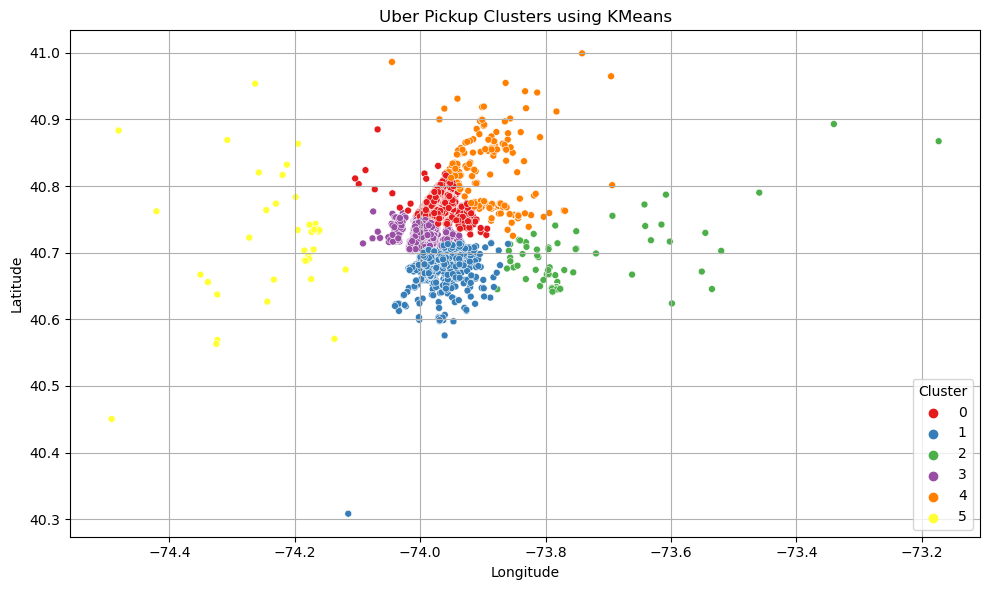

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=sample_df['Lon'], y=sample_df['Lat'], hue=sample_df['Cluster'], palette='Set1', s=25)
plt.title('Uber Pickup Clusters using KMeans')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
df['Cluster'] = kmeans.predict(scaler.transform(df[['Lat', 'Lon']]))


# Group by hour and cluster

In [19]:
cluster_hourly = df.groupby(['Cluster', 'hour']).size().unstack(fill_value=0)


In [ ]:
# Plot hourly demand for cluster

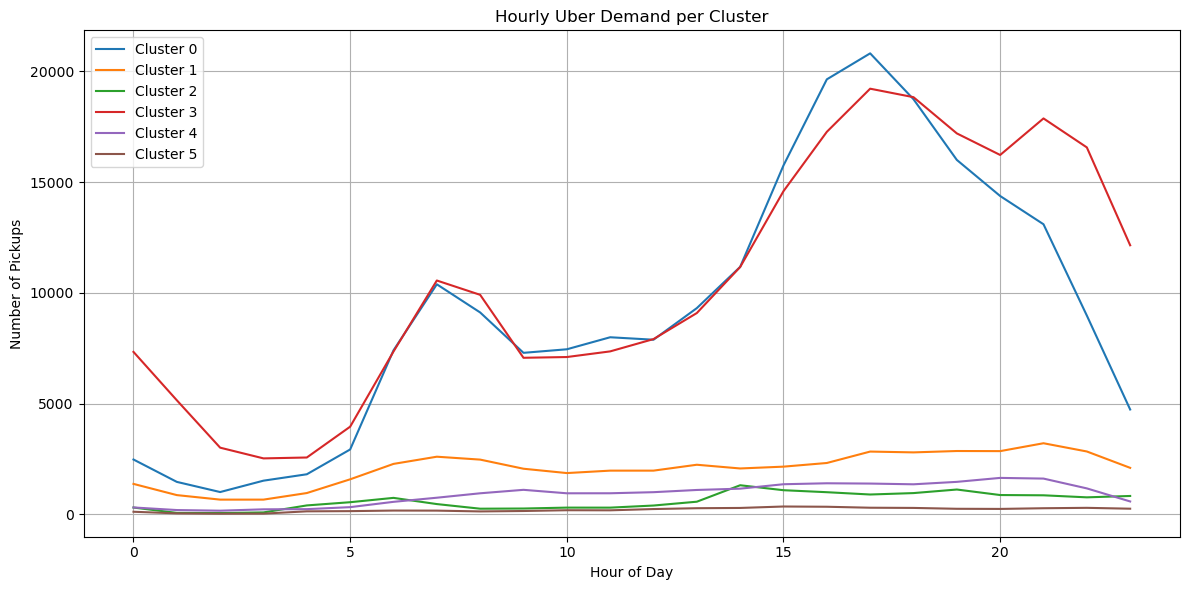

In [20]:
plt.figure(figsize=(12, 6))
for cluster_id in cluster_hourly.index:
    plt.plot(cluster_hourly.columns, cluster_hourly.loc[cluster_id], label=f'Cluster {cluster_id}')
plt.title('Hourly Uber Demand per Cluster')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Recommend fleet allocation based on average hourly demand

In [21]:
avg_demand = cluster_hourly.mean(axis=1).round().astype(int)
fleet_suggestion = pd.DataFrame({
    'Cluster': avg_demand.index,
    'Suggested_Vehicles': avg_demand.values
})
print("Recommended Fleet Allocation per Cluster:")
print(fleet_suggestion)

Recommended Fleet Allocation per Cluster:
   Cluster  Suggested_Vehicles
0        0                9221
1        1                2064
2        2                 599
3        3               10498
4        4                 912
5        5                 200
